In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as r
import warnings
#warnings.filterwarnings('ignore')

kills0 = pd.read_csv('D:\pubg_data\kill_match_stats_final_0.csv')

In [2]:
kills0 = kills0.dropna(axis = 0, how = "any")

In [3]:
kills0 = kills0.loc[(kills0['map'] == 'ERANGEL')]

In [4]:
kills0.loc[:, 'victim_position_x'] = round(64*kills0['victim_position_x']/800000)
kills0.loc[:, 'victim_position_y'] = round(64*kills0['victim_position_y']/800000) 
kills0

killed_by  killer_name  killer_placement  killer_position_x  \
179       Down and Out    Malcolm_x               9.0           496989.8   
180              M16A4    Malcolm_x               9.0           496989.8   
181                AKM       G_Berg               7.0           460416.7   
182                AKM  Lukesnake17              20.0           488034.1   
183                SKS     AlooGobi               2.0           501062.9   
...                ...          ...               ...                ...   
13426342        SCAR-L  Godlllllike               3.0           152645.6   
13426344  Down and Out    Subastral               9.0           298162.8   
13426345        SCAR-L       TingFg              20.0           447251.2   
13426346        SCAR-L    OldBlack6               3.0           152108.8   
13426347  Down and Out    liuyang23              19.0           446082.9   

          killer_position_y      map  \
179                312569.7  ERANGEL   
180                312569.7  ERANGEL   
181                414748.8  ERANGEL   
182                347220.3  ERANGEL   
183                425078.6  ERANGEL   
...                     ...      ...   
13426342           315228.9  ERANGEL   
13426344           501961.7  ERANGEL   
13426345           628701.7  ERANGEL   
13426346           315162.6  ERANGEL   
13426347           627984.4  ERANGEL   

                                                   match_id  time  \
179       2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...  1035   
180       2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...  1035   
181       2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...  1422   
182       2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...  1210   
183       2U4GBNA0YmnRe95wOy7kuweIkuZo5Roa0WjNZsgboi2gzz...  1818   
...                                                     ...   ...   
13426342  2U4GBNA0YmkTZQvSzreuDJjVgxqK1nIRqCKc5yGZ5INIVZ...   629   
13426344  2U4GBNA0YmkTZQvSzreuDJjVgxqK1nIRqCKc5yGZ5INIVZ...  1086   
13426345  2U4GBNA0YmkTZQvSzreuDJjVgxqK1nIRqCKc5yGZ5INIVZ...   327   
13426346  2U4GBNA0YmkTZQvSzreuDJjVgxqK1nIRqCKc5yGZ5INIVZ...   624   
13426347  2U4GBNA0YmkTZQvSzreuDJjVgxqK1nIRqCKc5yGZ5INIVZ...   344   

            victim_name  victim_placement  victim_position_x  \
179             Relugar              22.0               40.0   
180         LiPoBattery              22.0               40.0   
181            cornsour              16.0               37.0   
182             Homebrw               9.0               39.0   
183               Powfa               3.0               39.0   
...                 ...               ...                ...   
13426342  Nathaniel0209              11.0               12.0   
13426344     JimmyChiu_              28.0               24.0   
13426345       LYB_LaoJ              19.0               36.0   
13426346  jaydenhuang07              11.0               12.0   
13426347         TingFg              20.0               36.0   

          victim_position_y  
179                    27.0  
180                    27.0  
181                    33.0  
182                    28.0  
183                    35.0  
...                     ...  
13426342               25.0  
13426344               40.0  
13426345               50.0  
13426346               25.0  
13426347               50.0  

[9928829 rows x 12 columns]

In [5]:
temp = kills0.copy()

In [6]:
temp = temp.loc[temp['time'] <= 150]

In [7]:
arr = [[0]*64 for i in range(64)]
for ind, row in temp.iterrows():
    arr[round(row['victim_position_x'])][round(row['victim_position_y'])] += 1

In [8]:
arr[0][0] = 0
deaths = np.log(1+(np.array(arr)))/np.log(146983)

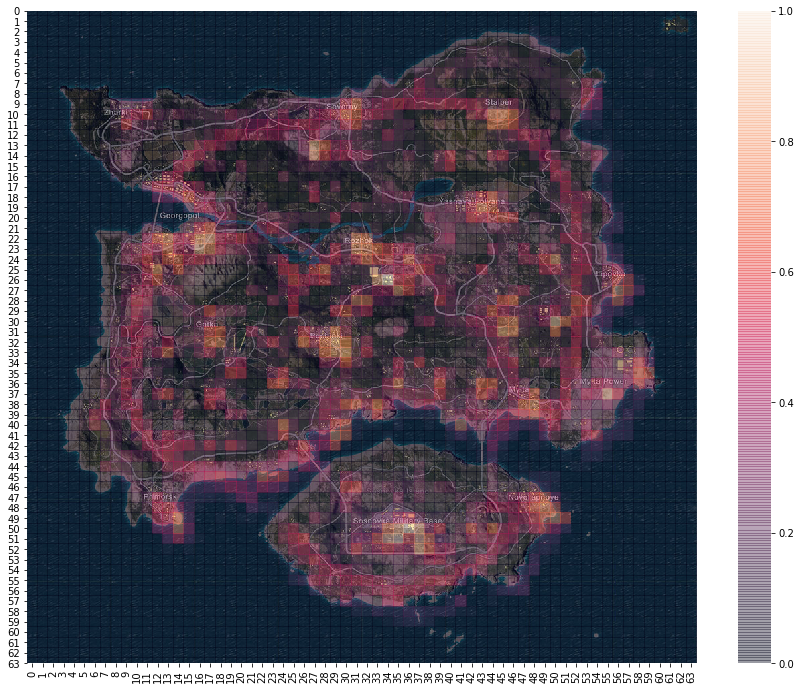

In [11]:
img = plt.imread('D:\pubg_data\erangel-pubg.jpg')
plt.figure(figsize = (15, 12))
ax = sns.heatmap(np.array(deaths).transpose(), alpha = 0.4, zorder = 2)
ax.imshow(img, aspect = ax.get_aspect(), extent = ax.get_xlim()+ax.get_ylim(), zorder = 1)

In [12]:
import requests
import json

In [13]:
endpoint = 'https://maps.pubgg.com/api/maps/erangel/entities'
req = requests.get(endpoint)
j = req.json()
data = pd.DataFrame.from_dict(j).T
data['lootStats'] = data['lootStats'].apply(lambda x: x['aggregateScore'])
temp_d = data.copy()
drop = [[0]*64 for i in range(64)]
for ind, row in temp_d.iterrows():
  if(drop[round(row['x']/125)][round(row['y']/125)] < row['lootStats']):
    drop[round(row['x']/125)][round(row['y']/125)] = row['lootStats']
    #if(drop[round(row['y']/125)][round(row['x']/125)] > 1):
     # drop[round(row['y']/125)][round(row['x']/125)] = 1

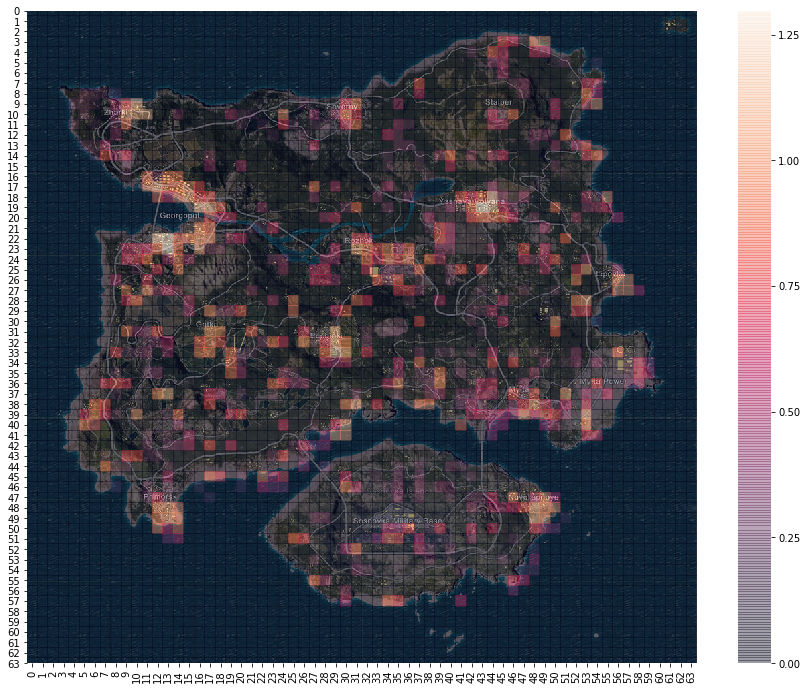

In [14]:
plt.figure(figsize = (15, 12))
ax = sns.heatmap(np.array(drop).transpose(), alpha = 0.4, zorder = 2)
ax.imshow(img, aspect = ax.get_aspect(), extent = ax.get_xlim()+ax.get_ylim(), zorder = 1)

In [673]:
x_s = int(input())
y_s = int(input())
x_f = int(input())
y_f = int(input())

def flight():
    if(x_s != x_f):
        a = float((y_s - y_f))/(x_s - x_f)
        c = y_s - a*x_s
        b = -1
    else:
        a = 1
        c = -x_s
        b = 0
    return [a, b, c]
print (flight())

0
63
63
0
[-1.0, -1, 63.0]


In [675]:
def dist(x, y):
    [a, b, c] = flight()
    return (abs((a*x+b*y+c)/((a**2+b**2)**(1/2))))
def f(a):
    x, y = a
    if((x < 0) or (y < 0) or (x > 63) or (y > 63)):
        return 5
    else:
        if(dist(x,y) > 12):
            #print (dist(x, y))
            return 100
        else:
            die = deaths[int(round(x))][int(round(y))]*0.5*(1+ scipy.special.erf(dist(x,y)/(2**(1/2))))
            loot = drop[int(round(x))][int(round(y))]
            if(loot == 0):
                return 100
            else:
                if(die == 0):
                    return 100
                else:
                    return (die/loot)

In [601]:
import scipy
from scipy.optimize import minimize
import random
import math

     fun: 0.07670568705681788
 message: ['Maximum number of iteration reached']
    nfev: 218110
    nhev: 0
     nit: 10000
    njev: 0
  status: 0
 success: True
       x: array([44.71059091,  3.41552954])


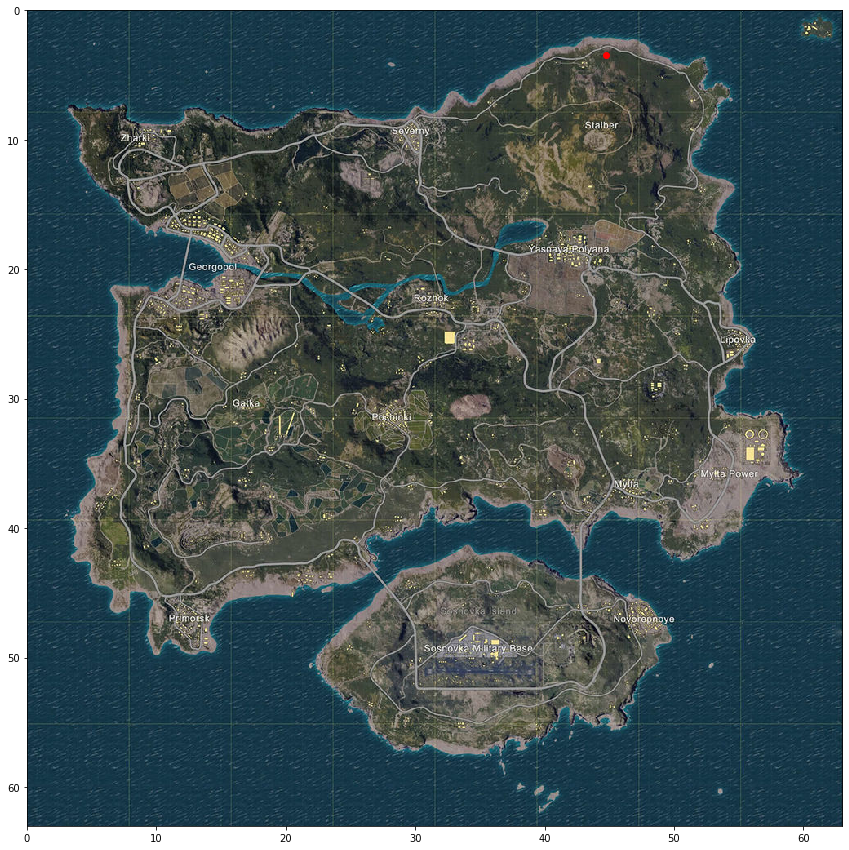

In [676]:
res = scipy.optimize.dual_annealing(f, [[0, 63], [0, 63]], maxiter = 10000)
print (res)
plt.figure(figsize = (20, 15))
pl = plt.plot(res.x[0], res.x[1], 'ro', zorder = 2)
plt.imshow(img, extent = (0, 63, 63 ,0))

In [659]:
def budget_set():
    b_set = []
    for i in range(0, 64):
        for j in range(0, 64):
            if ((dist(i, j) < 12) and drop[i][j] != 0):
                b_set.append([i, j])
    return b_set

def sim_ann(f, maxiter):
    T = 20
    k = 1
    x_0 = random.choice(budget_set())
    while(T > 0.01):
        alpha = 0.995
        T = alpha*T
        x_1 = random.choice(budget_set())
        delta_f = f(x_1) - f(x_0)
        #print (delta_f, x_1, x_0)
        if(delta_f < 0):
            x_0 = x_1
        else:
            if(random.random() < math.exp(-delta_f/T)):
                x_0 = x_1
                #print (math.exp(-delta_f/T))
        k += 1
    return (f(x_0), x_0, k)
    

In [678]:
print (sim_ann(f, 1000))

(0.07670568705681788, [45, 3], 1518)


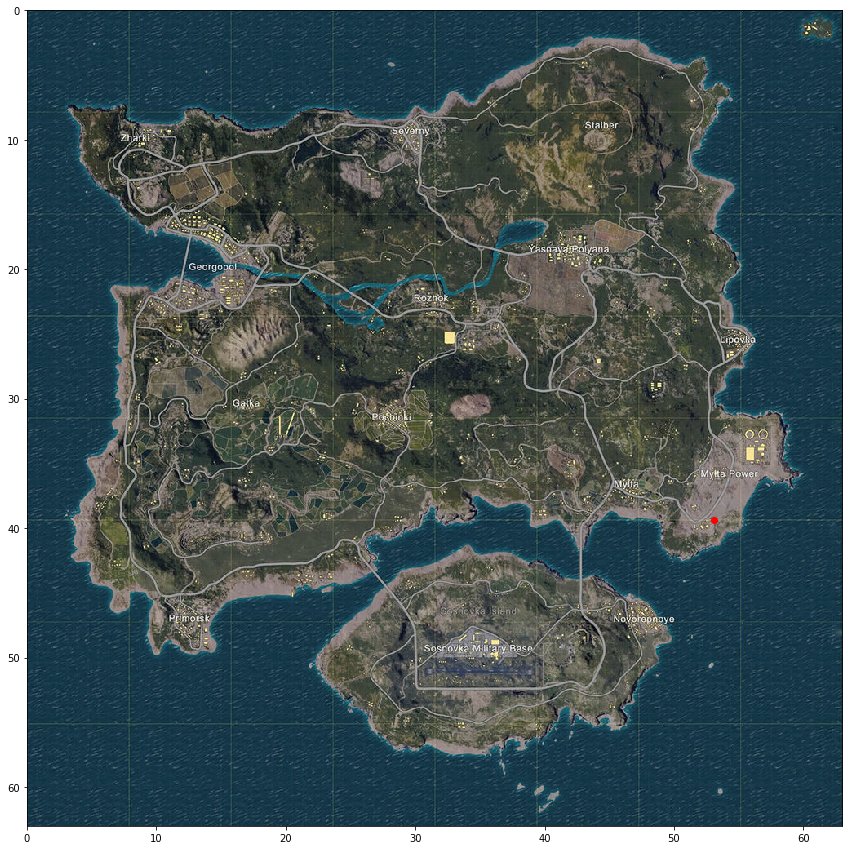

In [658]:
plt.figure(figsize = (20, 15))
pl = plt.plot(res.x[0], res.x[1], 'ro', zorder = 2)
plt.imshow(img, extent = (0, 63, 63 ,0)) #aspect = pl.get_aspect(), extent = pl.get_xlim()+pl.get_ylim(), zorder = 1)